In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
len(titanic)

891

In [6]:
titanic.isna().sum() / len(titanic) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.describe(include = ["object", "category"])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [10]:
titanic2 = titanic.astype({"fare": "object", "age": "object", "sex": "category"})
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    object  
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    object  
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), int64(4), object(6)
memory usage: 74.7+ KB


In [11]:
titanic2['sex'] = titanic2['sex'].cat.add_categories('kille')

In [12]:
titanic2["sex"].unique()

['male', 'female']
Categories (3, object): ['female', 'male', 'kille']

In [13]:
titanic2.loc[0, 'sex'] = 'kille'
titanic2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,kille,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values. Examples are gender, social class, blood type, country affiliation.

The categorical data type is useful in the following cases:

    A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory.

    The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.

    As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).


In [14]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [15]:
titanic2.dtypes

survived          int64
pclass            int64
sex            category
age              object
sibsp             int64
parch             int64
fare             object
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [16]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [17]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

value_counts() returns a Series containing counts of unique values. The result will be in descending order so that the first element is the most freqently occuring element. **Excludes NA values by default.**

In [18]:
print ('Number of passengers who survived...', len(titanic[titanic['survived'] == 1]))

Number of passengers who survived... 342


In [19]:
print ('Number of passengers who survived...', len(titanic['survived'] == 1))

Number of passengers who survived... 891


Код выше выдаёт количество всех пассажиров, а не выживших, потому что в выражении titanic['survived'] == 1 проверяется условие для каждого пассажира в столбце 'survived', и это возвращает булеву серию, где True обозначает пассажиров, которые выжили, и False - пассажиров, которые не выжили.

titanic[titanic['survived'] == 1] же используется для фильтрации DataFrame titanic, оставляя только строки, где значение столбца 'survived' равно 1 (то есть пассажиры, которые выжили). Затем функция len() используется для подсчета количества строк в полученном фильтрованном DataFrame. Это возвращает количество выживших пассажиров.

***What is the procent of men and women who survived?***

In [22]:
print (titanic['sex'].value_counts())

print('% of male who survived ', 100*np.mean(titanic['survived'][titanic['sex']=='male']))
print('% of female who survived ', 100*np.mean(titanic['survived'][titanic['sex']=='female']))

sex
male      577
female    314
Name: count, dtype: int64
% of male who survived  18.890814558058924
% of female who survived  74.20382165605095


titanic['sex'] == 'male' - Это создает булеву серию (массив из True и False), где каждое значение соответствует пассажиру в DataFrame titanic и имеет значение True, если пол этого пассажира равен "male" (мужской пол), и False, если это не так. Таким образом, эта булева серия фильтрует только мужчин.

np.mean(titanic['survived'][titanic['sex']=='male']) - Это использует функцию np.mean() для вычисления среднего значения булевой серии, полученной в предыдущем шаге. Поскольку в столбце 'survived' 1 обозначает выживших, а 0 - невыживших, среднее значение этой булевой серии даст процент мужчин, которые выжили среди всех мужчин в DataFrame titanic.

Survival by class and age columns

In [25]:
print(titanic['pclass'].value_counts())

print('% passengers who survived in the first class', 100*np.mean(titanic['survived'][titanic['pclass']== 1]))
print('% passengers who survived in the second class', 100*np.mean(titanic['survived'][titanic['pclass']== 2]))
print('% passengers who survived in the third class', 100*np.mean(titanic['survived'][titanic['pclass']== 3]))

print(titanic [["pclass", "survived"]].groupby(["pclass"]).mean())

pclass
3    491
1    216
2    184
Name: count, dtype: int64
% passengers who survived in the first class 62.96296296296296
% passengers who survived in the second class 47.28260869565217
% passengers who survived in the third class 24.236252545824847
        survived
pclass          
1       0.629630
2       0.472826
3       0.242363


## Dealing with missing values

In [33]:
titanic3 = titanic.copy()
titanic3.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We can clearly see which columns contain null values, so we pick them one by one and update those columns.

In [34]:
titanic3["age"] = titanic3["age"].fillna(np.mean(titanic3["age"]))

titanic3.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
titanic3["age"].fillna(np.mean(titanic3["age"]), inplace = True)

titanic3.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We'll now handle the Embarked column. As it only has 2 null values we either drop those rows or we can replace with the mode of the columns since it's an object column.

In [37]:
titanic3["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
titanic3["embarked"].mode()

0    S
Name: embarked, dtype: object

In [44]:
titanic3["embarked"].fillna(titanic3["embarked"].mode()[0], inplace = True)
titanic3["embark_town"].fillna(titanic3["embark_town"].mode()[0], inplace = True)
titanic3.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Now we will deal with the deck column

In [41]:
titanic3['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

I would rather drop this column, as there is too little data in it

In [43]:
titanic3.drop(columns = 'deck', inplace = True)

titanic3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

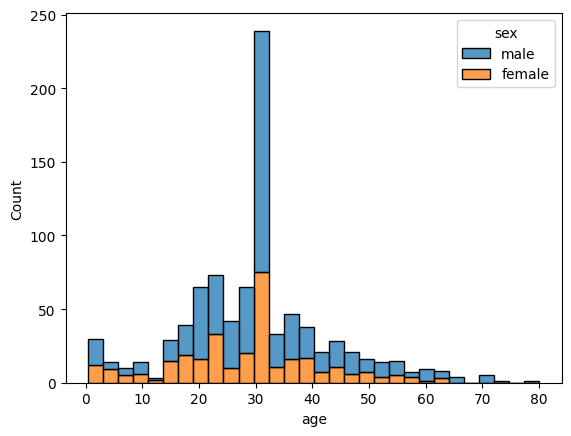

In [48]:
sns.histplot(x = 'age', hue = 'sex', multiple = 'stack', data = titanic3)

Параметр multiple в функции sns.histplot() в библиотеке Seaborn используется для определения того, как данные будут отображаться на гистограмме, когда есть несколько уровней (например, когда нужно сравнить распределения нескольких категорий).

multiple имеет несколько вариантов значений:

'layer' (по умолчанию) - это настройка, при которой данные для разных категорий (или уровней) будут наложены друг на друга. Это позволяет легко сравнивать распределения, но может быть сложно интерпретировать, если уровни перекрываются.

'stack' - это настройка, при которой данные для разных категорий будут стопкой одна над другой на гистограмме. Это может помочь визуально сравнивать суммарное распределение.

'dodge' - это настройка, при которой данные для разных категорий будут отображаться с отступом друг от друга, чтобы легко сравнить их.